# Diversity (shannon Index) analysis of the cluster clases within PFT and hydrological managements

Author: Javier Lopatin \
Date: 2025-11-10 \
Version: 1.0 

In [3]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rio
from skbio import diversity
from geocube.api.core import make_geocube

In [4]:
# set working directory
os.chdir("/Volumes/Elements/Suisun")
os.getcwd()

'/Volumes/Elements/Suisun'

In [5]:
# load raster masks of clusters
clusters = rio.open_rasterio('Rasters/kmenas_KernelPCA_clip_9.tif').squeeze()

np.unique(clusters.values)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., nan])

In [6]:
# load pft shapefile
pft = gpd.read_file('SHP/Suisun_PFT_diss.shp')
pft.head()

,PFT,OBJECTID,NVCSName,NVCSLevel,MapClass,MapClassCo,Original_2,Original_1,Cov_2015,Dist_2015,...,CaCode,NVCSAllian,NVCSGroup,NVCSMG,UID,Acres,Hectares,Shape_Leng,Shape_Area,geometry
0,Agriculture,5127.0,Row and Close Grain Crop,Formation,Row and Close Grain Crop Formation,9311000,Cultivated Annual Graminoid mu,225,N/A,N/A,...,None,None,None,None,SUMA05127,8.772331,3.550037,1396.592914,35497.125425,"MULTIPOLYGON (((576268.676 4227452.662, 576171..."
1,Barren,4.0,Barren,None,Bare Ground Mapping Unit,1,Bare Ground mu,1,2-10%,Not evident,...,None,None,None,None,SUMA00004,1.008580,0.408158,489.626308,4081.251382,"MULTIPOLYGON (((577902.391 4213758.453, 577901..."
2,Bay,61.0,"Lacustrine, Estuarine",None,Open Water Mapping Unit,11,Open Water mu,11,<2%,Not evident,...,None,None,None,None,SUMA00061,1.096031,0.443548,568.031480,4435.105544,"MULTIPOLYGON (((576763.421 4213354.679, 576764..."
3,Grassland,10.0,Mediterranean California Naturalized Annual an...,Group,Mediterranean California Naturalized Annual an...,4111000,Mediterranean CA naturalized annual and perenn...,227,25-50%,Low,...,42.051.02,Phalaris aquatica,Mediterranean California naturalized annual an...,California Annual and Perennial Grassland,SUMA00010,1.051968,0.425717,431.385943,4256.796506,"MULTIPOLYGON (((576470.39 4211450.538, 576469...."
4,Other,14.0,Baccharis pilularis / Annual Grass-Herb,Association,Baccharis pilularis / Annual Grass-Herb Associ...,6111101,Baccharis pilularis /Annual Grasses Association,603,25-50%,Low,...,32.060.20,Baccharis pilularis,California Coastal evergreen bluff and dune scrub,Vancouverian Coastal Dune and Bluff,SUMA00014,0.466919,0.188956,288.399041,1889.354629,"MULTIPOLYGON (((576550.841 4212832.126, 576551..."


In [7]:
pft.PFT.unique()

array(['Agriculture', 'Barren', 'Bay', 'Grassland', 'Other',
       'Pickleweed-Cordgrass-Saltbush', 'Riparian-Woody', 'Tule-Cattail',
       'Urban or developed', 'Water', 'Wet Meadows'], dtype=object)

In [8]:
# don't include classes outside the analysis
pft = pft[~pft.PFT.isin(["Urban or developed", "Agriculture", "Bay", "Water"])]
pft.PFT.unique()

array(['Barren', 'Grassland', 'Other', 'Pickleweed-Cordgrass-Saltbush',
       'Riparian-Woody', 'Tule-Cattail', 'Wet Meadows'], dtype=object)

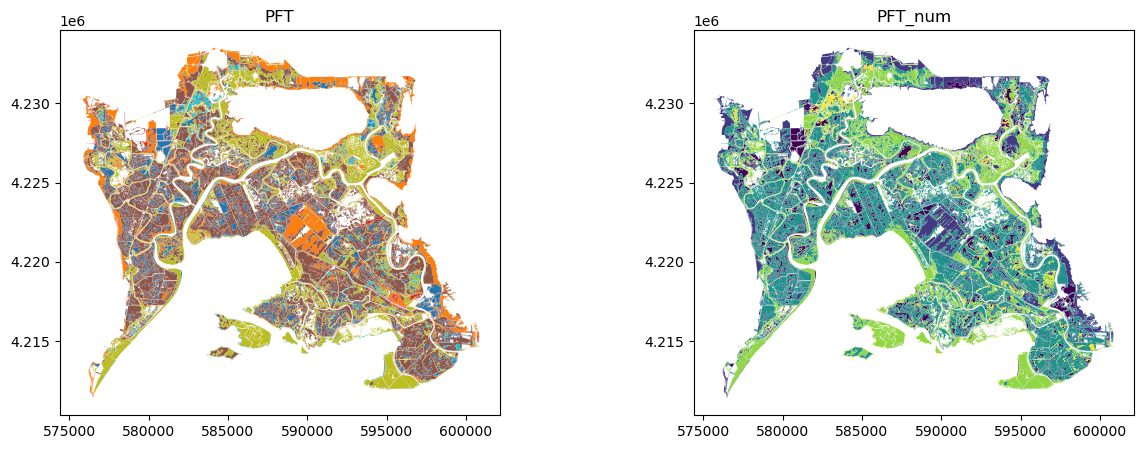

In [9]:
# Define a mapping from original values to integers
mapping = {val: i for i, val in enumerate(pft.PFT.unique())}

# Create a new column 'PFT_num' by mapping the values from 'PFT' column
pft['PFT_num'] = pft['PFT'].map(mapping)


# plot pft.PFT and pft.PFT_num side by side. Use same color scheme for both plots
fig, ax = plt.subplots(1,2, figsize=(15,5))
pft.plot(column='PFT', ax=ax[0])
pft.plot(column='PFT_num', ax=ax[1])
ax[0].set_title('PFT')
ax[1].set_title('PFT_num')
plt.show()

In [10]:
# pft.PFT and pft.PFT_num values side by side
pft[['PFT', 'PFT_num']]

,PFT,PFT_num
1,Barren,0
3,Grassland,1
4,Other,2
5,Pickleweed-Cordgrass-Saltbush,3
6,Riparian-Woody,4
7,Tule-Cattail,5
10,Wet Meadows,6


In [11]:
print('CRS shapefile =', pft.crs)
print('CRS raster =', clusters.rio.crs)

CRS shapefile = EPSG:32610
CRS raster = PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


ERROR 1: PROJ: internal_proj_identify: /opt/miniconda3/share/proj/proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.


In [12]:
pft_raster = make_geocube(
    vector_data=pft,
    measurements=['PFT_num'],
    like=clusters
    #resolution=(-10.0, 10.0),
    #output_crs='epsg:32610'
    #output_bounds=(xmin, ymin, xmax, ymax)  # replace with your data bounds
)


pft_raster

<xarray.Dataset> Size: 45MB
Dimensions:      (y: 2243, x: 2530)
Coordinates:
  * y            (y) float64 18kB 4.234e+06 4.234e+06 ... 4.211e+06 4.211e+06
  * x            (x) float64 20kB 5.756e+05 5.756e+05 ... 6.009e+05 6.009e+05
    spatial_ref  int64 8B 0
Data variables:
    PFT_num      (y, x) float64 45MB nan nan nan nan nan ... nan nan nan nan nan

In [13]:
pft_raster.rio.resolution()

(10.0, -10.0)

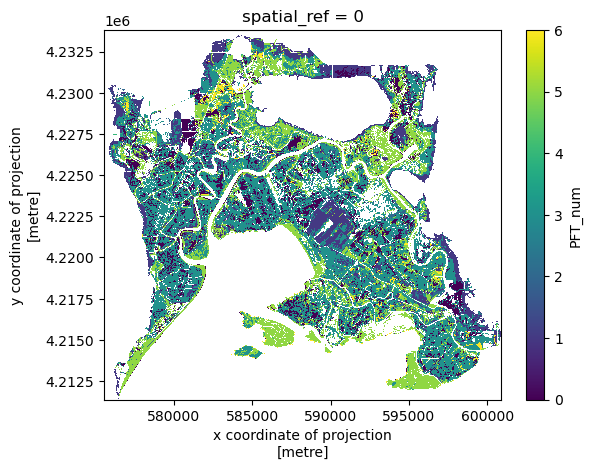

In [14]:
pft_raster.PFT_num.plot()

In [15]:
np.unique(pft_raster.PFT_num.values)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., nan])

In [16]:
# mask out pft values using cluster masks
pft_class1 = pft_raster.where(clusters == 1)
pft_class2 = pft_raster.where(clusters == 2)
pft_class3 = pft_raster.where(clusters == 3)
pft_class4 = pft_raster.where(clusters == 4)
pft_class5 = pft_raster.where(clusters == 5)
pft_class6 = pft_raster.where(clusters == 6)
pft_class7 = pft_raster.where(clusters == 7)
pft_class8 = pft_raster.where(clusters == 8)
pft_class9 = pft_raster.where(clusters == 9)

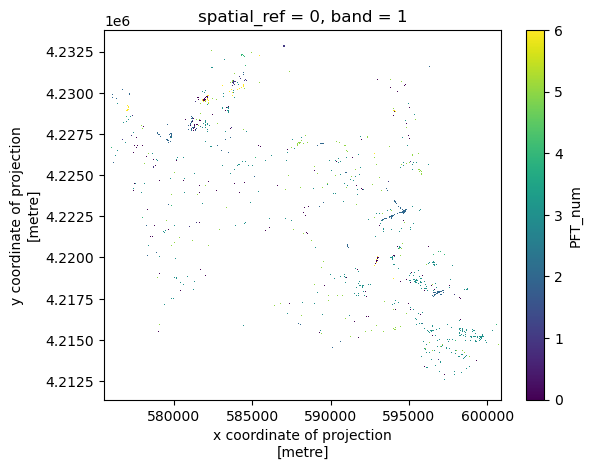

In [17]:
pft_class1.PFT_num.plot()

In [18]:
list_class = [pft_class1, pft_class2, pft_class3, pft_class4, pft_class5, pft_class6, pft_class7, pft_class8, pft_class9]

for i in range(9):
    x=list_class[i].PFT_num
    prop = ( x.count().values * 100)  / pft_raster.PFT_num.count().values
    prop = np.round( prop, 2 )
    print( 'Cluster', i+1, 'is ', prop, '% of the data' )

Cluster 1 is  1.62 % of the data
Cluster 2 is  8.57 % of the data
Cluster 3 is  16.58 % of the data
Cluster 4 is  15.09 % of the data
Cluster 5 is  14.96 % of the data
Cluster 6 is  1.51 % of the data
Cluster 7 is  11.02 % of the data
Cluster 8 is  10.0 % of the data
Cluster 9 is  20.64 % of the data


In [19]:
def calculate_shannon_diversity(xarr):
    """
    Calculate the Shannon diversity of an xarray object.
    
    Parameters:
    - xarr: xarray DataArray containing the 2D image data.
    
    Returns:
    - Shannon diversity value.
    """
    
    # 1. Extract all pixel values and reshape them to a 1D array
    values = xarr.values.flatten()

    # 2. Remove any NaN values
    non_nan_values = values[~np.isnan(values)]

    # 3. Transform the non-NaN values into a single string
    string_representation = ''.join(map(str, non_nan_values.astype(int)))

    # Create a count of each unique value (pixel intensity or class)
    counts = [string_representation.count(str(i)) for i in set(string_representation)]

    # 4. Calculate the Shannon diversity
    shannon_diversity = diversity.alpha_diversity('shannon', [counts])[0]

    return shannon_diversity


In [20]:
# get the shannon diversity indices for the classes
shannon_1 = calculate_shannon_diversity(pft_class1.PFT_num)
shannon_2 = calculate_shannon_diversity(pft_class2.PFT_num)
shannon_3 = calculate_shannon_diversity(pft_class3.PFT_num)
shannon_4 = calculate_shannon_diversity(pft_class4.PFT_num)
shannon_5 = calculate_shannon_diversity(pft_class5.PFT_num)
shannon_6 = calculate_shannon_diversity(pft_class6.PFT_num)
shannon_7 = calculate_shannon_diversity(pft_class7.PFT_num)
shannon_8 = calculate_shannon_diversity(pft_class8.PFT_num)
shannon_9 = calculate_shannon_diversity(pft_class9.PFT_num)

# print all shannon diversity values
print('Shannon diversity values:')
print('Cluster 1:', shannon_1)
print('Cluster 2:', shannon_2)
print('Cluster 3:', shannon_3)
print('Cluster 4:', shannon_4)
print('Cluster 5:', shannon_5)
print('Cluster 6:', shannon_6)
print('Cluster 7:', shannon_7)
print('Cluster 8:', shannon_8)
print('Cluster 9:', shannon_9)

Shannon diversity values:
Cluster 1: 1.557533427232693
Cluster 2: 0.9213943175780143
Cluster 3: 1.1174029772923055
Cluster 4: 1.0928067135710844
Cluster 5: 1.0111882985151754
Cluster 6: 0.9392096820653759
Cluster 7: 1.0677395747126115
Cluster 8: 1.2515870144470176
Cluster 9: 1.1415800127646518


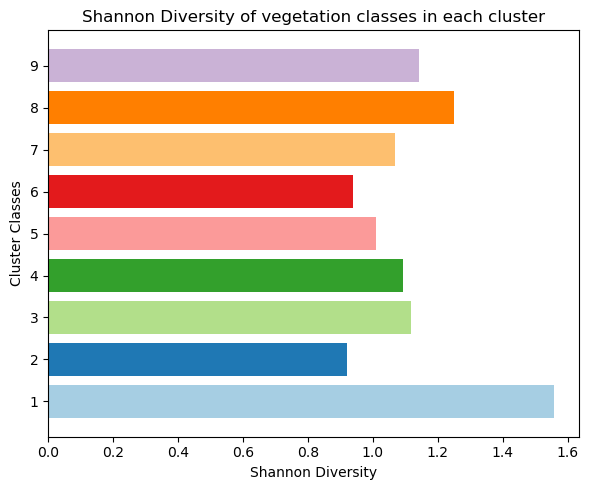

In [21]:
# Values
diversities = [shannon_1, shannon_2, shannon_3, shannon_4, shannon_5, shannon_6, shannon_7, shannon_8, shannon_9]

# Classes
classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

# Colors
col = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

# Bar plot
plt.figure(figsize=(6,5))
plt.barh(classes, diversities, color=col)

# Title and labels
plt.title('Shannon Diversity of vegetation classes in each cluster')
plt.ylabel('Cluster Classes')
plt.xlabel('Shannon Diversity')
plt.tight_layout()

# Show the plot
# plt.savefig('figures/Shannon_diversity.svg')


In [22]:
def calculate_class_proportions(xarr):
    """
    Calculate the proportion of each class inside an xarray DataArray.

    Parameters:
    - xarr: xarray DataArray containing class labels.

    Returns:
    - proportions: Dictionary where keys are unique class labels and values are their respective proportions.
    """

    # Flatten the xarray and convert to a numpy array
    flattened = xarr.values.flatten()

    # Remove NaN values
    valid_pixels = flattened[~np.isnan(flattened)]

    # Count occurrences of each unique value
    unique, counts = np.unique(valid_pixels, return_counts=True)

    # Calculate proportions
    total_pixels = len(valid_pixels)
    proportions = {int(u): c / total_pixels for u, c in zip(unique, counts)}

    return proportions


In [23]:
prop_1 = calculate_class_proportions(pft_class1.PFT_num)
prop_2 = calculate_class_proportions(pft_class2.PFT_num)
prop_3 = calculate_class_proportions(pft_class3.PFT_num)
prop_4 = calculate_class_proportions(pft_class4.PFT_num)
prop_5 = calculate_class_proportions(pft_class5.PFT_num)
prop_6 = calculate_class_proportions(pft_class6.PFT_num)
prop_7 = calculate_class_proportions(pft_class7.PFT_num)
prop_8 = calculate_class_proportions(pft_class8.PFT_num)
prop_9 = calculate_class_proportions(pft_class9.PFT_num)

In [24]:
prop_1

{0: np.float64(0.1543300949252568),
 1: np.float64(0.03518637084875985),
 2: np.float64(0.16429585502324415),
 3: np.float64(0.4357097124404977),
 4: np.float64(0.0204604292514545),
 5: np.float64(0.15021017175625645),
 6: np.float64(0.039807365754530526)}

In [25]:
mapping

{'Barren': 0,
 'Grassland': 1,
 'Other': 2,
 'Pickleweed-Cordgrass-Saltbush': 3,
 'Riparian-Woody': 4,
 'Tule-Cattail': 5,
 'Wet Meadows': 6}

In [26]:
def calculate_cluster_proportions(cluster_class_proportions):
    # Initialize the cluster_proportions dictionary
    result_proportions = {cluster_class: {} for cluster_class in cluster_class_proportions.keys()}

    pft_dict = {
        'Barren': 0,
        'Grassland': 1,
        'Other': 2,
        'Pickleweed-Cordgrass-Saltbush': 3,
        'Riparian-Woody': 4,
        'Tule-Cattail': 5,
        'Wet Meadows': 6
    }

    # Loop through each PFT name and its corresponding number
    for pft_name, pft_num in pft_dict.items():
        
        # For each cluster class, calculate and store the proportion for the current PFT class
        for cluster_class, proportions in cluster_class_proportions.items():
            result_proportions[cluster_class][pft_name] = proportions.get(pft_num, 0)

    return result_proportions


In [27]:
cluster_class_proportions = {
    'Cluster 1': prop_1,
    'Cluster 2': prop_2,
    'Cluster 3': prop_3,
    'Cluster 4': prop_4,
    'Cluster 5': prop_5,
    'Cluster 6': prop_6,
    'Cluster 7': prop_7,
    'Cluster 8': prop_8,
    'Cluster 9': prop_9
}


proportions_all = calculate_cluster_proportions(cluster_class_proportions)
proportions_all

{'Cluster 1': {'Barren': np.float64(0.1543300949252568),
  'Grassland': np.float64(0.03518637084875985),
  'Other': np.float64(0.16429585502324415),
  'Pickleweed-Cordgrass-Saltbush': np.float64(0.4357097124404977),
  'Riparian-Woody': np.float64(0.0204604292514545),
  'Tule-Cattail': np.float64(0.15021017175625645),
  'Wet Meadows': np.float64(0.039807365754530526)},
 'Cluster 2': {'Barren': np.float64(0.5213728417465434),
  'Grassland': np.float64(0.014417370478416146),
  'Other': np.float64(0.0010023053021950487),
  'Pickleweed-Cordgrass-Saltbush': np.float64(0.4227196235552297),
  'Riparian-Woody': np.float64(0.0008493218613336991),
  'Tule-Cattail': np.float64(0.0341997119691079),
  'Wet Meadows': np.float64(0.005438825087174185)},
 'Cluster 3': {'Barren': np.float64(0.07981512705922154),
  'Grassland': np.float64(0.02556190351465942),
  'Other': np.float64(0.0018252656047931639),
  'Pickleweed-Cordgrass-Saltbush': np.float64(0.43205319189571156),
  'Riparian-Woody': np.float64(0.

In [ ]:
# How much of each PFT is in each cluster? Statistics of how variable are the classes

# Convert to DataFrame: rows = clusters, columns = PFTs
df_cluster_pft = pd.DataFrame(proportions_all).T  # shape: (n_clusters, n_PFTs)
df_cluster_pft = df_cluster_pft * 100

# Display the raw proportions (how much of each PFT in each cluster)
display(df_cluster_pft)

# Calculate statistics of how variable are the classes (PFTs) across clusters
stats_pft_variation = df_cluster_pft.describe().T[['mean', 'std', 'min', 'max']]
display(stats_pft_variation)

# Which classes (PFTs) are most/least variable across clusters?
print("Standard deviation of each PFT across clusters (higher means more variable between clusters):")
print(stats_pft_variation['std'].sort_values(ascending=False))


,Barren,Grassland,Other,Pickleweed-Cordgrass-Saltbush,Riparian-Woody,Tule-Cattail,Wet Meadows
Cluster 1,15.433009,3.518637,16.429586,43.570971,2.046043,15.021017,3.980737
Cluster 2,52.137284,1.441737,0.100231,42.271962,0.084932,3.419971,0.543883
Cluster 3,7.981513,2.556190,0.182527,43.205319,0.209537,44.019186,1.845728
Cluster 4,5.302572,8.005120,2.817366,69.752439,1.414079,10.366216,2.342209
Cluster 5,4.305666,61.231469,1.799974,29.238314,0.325041,2.339089,0.760446
Cluster 6,62.794316,1.875841,0.083770,28.610322,0.227375,5.866866,0.541511
Cluster 7,27.616702,1.833559,0.185162,57.561276,0.110851,11.482120,1.210330
Cluster 8,10.741580,18.779553,1.021715,56.067620,0.358822,11.794517,1.236194
Cluster 9,3.927829,3.174694,0.765406,35.915584,0.992640,51.881085,3.342763


,mean,std,min,max
Barren,21.137830,22.028906,3.927829,62.794316
Grassland,11.379645,19.488883,1.441737,61.231469
Other,2.598415,5.268507,0.083770,16.429586
Pickleweed-Cordgrass-Saltbush,45.132645,13.716262,28.610322,69.752439
Riparian-Woody,0.641036,0.691232,0.084932,2.046043
Tule-Cattail,17.354452,17.938678,2.339089,51.881085
Wet Meadows,1.755978,1.241081,0.541511,3.980737


Standard deviation of each PFT across clusters (higher means more variable between clusters):
Barren                           22.028906
Grassland                        19.488883
Tule-Cattail                     17.938678
Pickleweed-Cordgrass-Saltbush    13.716262
Other                             5.268507
Wet Meadows                       1.241081
Riparian-Woody                    0.691232
Name: std, dtype: float64


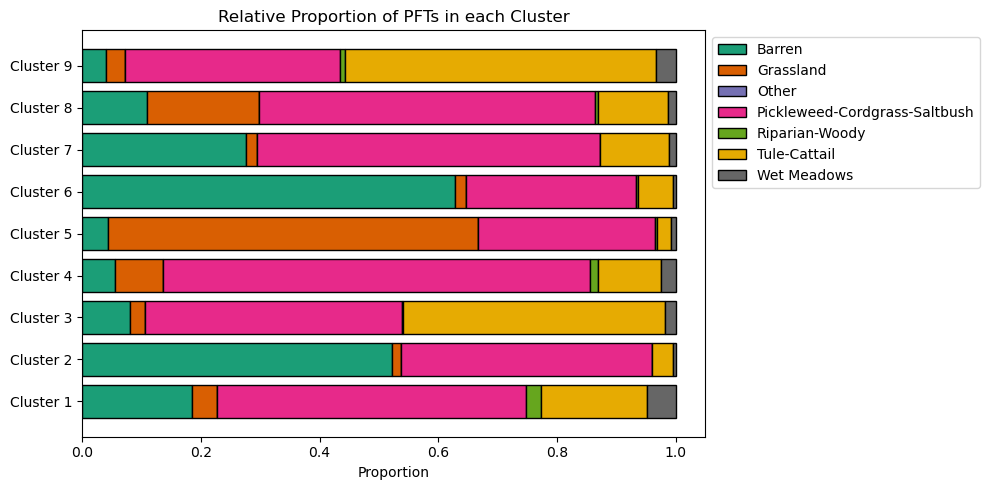

In [28]:
import matplotlib.pyplot as plt

def plot_cluster_proportions_normalized(proportions, colors):
    # PFT classes of interest
    pft_interest = pft.PFT.unique()
    
    clusters = list(proportions.keys())
    
    # Set up data for plotting
    data = {pft: [proportions[cluster].get(pft, 0) for cluster in clusters] for pft in pft_interest}
    data['Other'] = []
    for cluster in clusters:
        other_val = sum([proportions[cluster][pft] for pft in proportions[cluster] if pft not in pft_interest])
        data['Other'].append(other_val)

    # Normalize each cluster's values to 100%
    for cluster_idx in range(len(clusters)):
        total = sum([data[pft_class][cluster_idx] for pft_class in data])
        for pft_class in data:
            data[pft_class][cluster_idx] = (data[pft_class][cluster_idx] / total)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 5))
    
    bottom_data = [0] * len(clusters)
    for idx, (pft_class, values) in enumerate(data.items()):
        bars = ax.barh(clusters, values, left=bottom_data, label=pft_class, color=colors[idx], edgecolor='black')
        bottom_data = [i + j for i, j in zip(bottom_data, values)]

    ax.set_xlabel('Proportion')
    ax.set_title('Relative Proportion of PFTs in each Cluster')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()

##############3

colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02', '#666666']
plot_cluster_proportions_normalized(proportions_all, colors)
#plt.savefig('figures/Proportions_inClusters.svg')

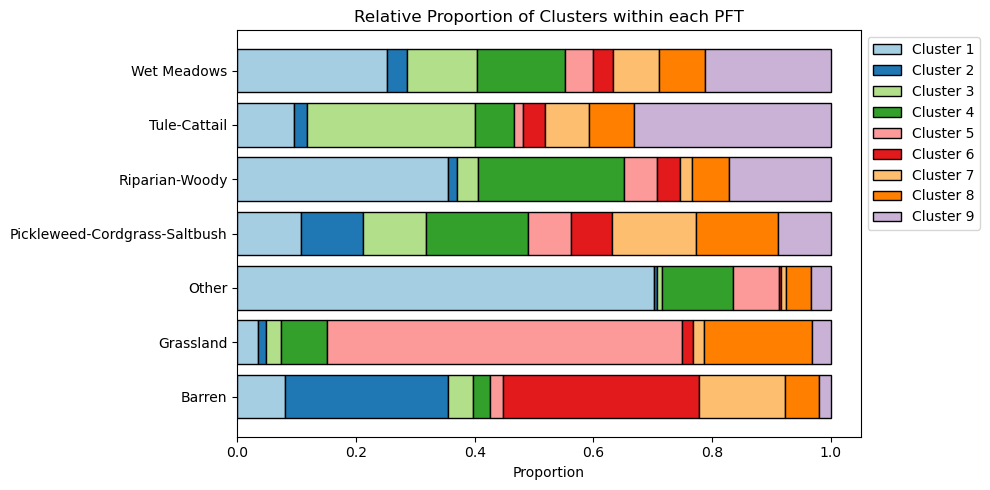

In [35]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_vegetation_proportions_normalized(proportions, colors):
    # PFT classes of interest
    pft_interest = pft.PFT.unique()

    # Extract cluster classes from the proportions data
    cluster_classes = list(proportions.keys())
    if len(cluster_classes) != 9:
        raise ValueError("Expected proportions for 9 clusters, but received a different number.")

    # Prepare data for plotting
    data = {cluster: [proportions[cluster].get(pft, 0) for pft in pft_interest[:-1]] for cluster in cluster_classes}
    
    # Add the "Other" category
    for cluster in cluster_classes:
        other_proportion = 1 - sum(data[cluster])
        data[cluster].append(other_proportion)

    # Normalize each PFT's values to 100%
    for pft_idx in range(len(pft_interest)):
        total = sum([data[cluster_class][pft_idx] for cluster_class in cluster_classes])
        for cluster_class in data:
            data[cluster_class][pft_idx] = (data[cluster_class][pft_idx] / total) if total != 0 else 0

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 5))
    
    bottom_data = [0] * len(pft_interest)
    for idx, (cluster_class, values) in enumerate(data.items()):
        bars = ax.barh(pft_interest, values, left=bottom_data, label=f'{cluster_class}', color=colors[idx], edgecolor='black')
        bottom_data = [i + j for i, j in zip(bottom_data, values)]

    ax.set_xlabel('Proportion')
    ax.set_title('Relative Proportion of Clusters within each PFT')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()


########


col = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

plot_vegetation_proportions_normalized(proportions_all, col)
plt.savefig('figures/Proportions_inPFTs.svg')


## Management analysis

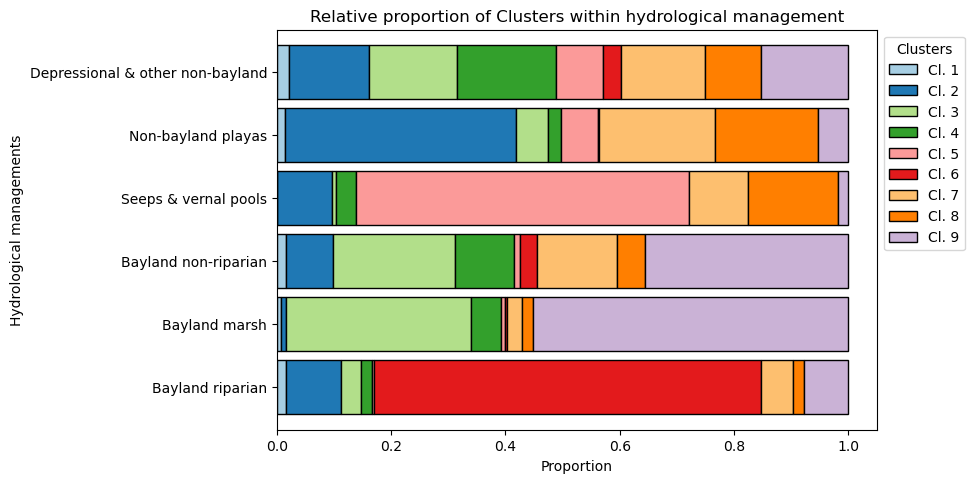

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Bayland riparian': [271400, 1705200, 606000, 327600, 62000, 11849500, 974800, 319300, 1371300],
    'Bayland marsh': [208700, 296500, 10405100, 1687900, 268000, 106900, 826800, 603700, 17787900],
    'Bayland non-riparian': [41400, 222800, 573500, 275100, 29100, 77600, 376700, 129700, 955100],
    'Seeps & vernal pools': [400, 52800, 4000, 18800, 320000, 0, 56900, 86000, 10200],
    'Non-bayland playas': [29800, 904900, 125800, 51700, 144800, 4200, 455100, 404100, 116800],
    'Depressional & other non-bayland': [3726100, 24419900, 27034900, 30320600, 14299400, 5463200, 25636000, 17391900, 26638000]
}

# Create a DataFrame
df = pd.DataFrame(data, index=['Cl. 1', 'Cl. 2', 'Cl. 3', 'Cl. 4', 'Cl. 5', 'Cl. 6', 'Cl. 7', 'Cl. 8', 'Cl. 9'])

# Normalize the data to get proportions
df_normalized = df.div(df.sum(axis=0), axis=1)

# Define the color palette
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']

# Plot the figure
fig, ax = plt.subplots(figsize=(10, 5))
df_normalized.T.plot(kind='barh', stacked=True, ax=ax, color=colors, width=0.85, edgecolor='black')

# Add labels and title
ax.set_xlabel('Proportion')
ax.set_ylabel('Hydrological managements')
ax.set_title('Relative proportion of Clusters within hydrological management')
#plt.xticks(rotation=45, ha='right')
plt.legend(title='Clusters', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Adjust layout to reduce space between bars
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)

#plt.savefig('Proportions_inManagement.svg')


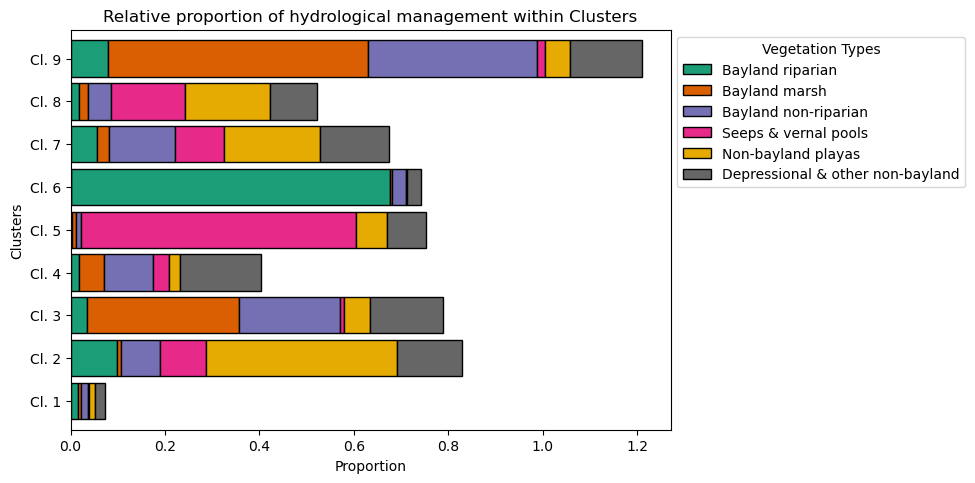

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Bayland riparian': [271400, 1705200, 606000, 327600, 62000, 11849500, 974800, 319300, 1371300],
    'Bayland marsh': [208700, 296500, 10405100, 1687900, 268000, 106900, 826800, 603700, 17787900],
    'Bayland non-riparian': [41400, 222800, 573500, 275100, 29100, 77600, 376700, 129700, 955100],
    'Seeps & vernal pools': [400, 52800, 4000, 18800, 320000, 0, 56900, 86000, 10200],
    'Non-bayland playas': [29800, 904900, 125800, 51700, 144800, 4200, 455100, 404100, 116800],
    'Depressional & other non-bayland': [3726100, 24419900, 27034900, 30320600, 14299400, 5463200, 25636000, 17391900, 26638000]
}

# Create a DataFrame
df = pd.DataFrame(data, index=['Cl. 1', 'Cl. 2', 'Cl. 3', 'Cl. 4', 'Cl. 5', 'Cl. 6', 'Cl. 7', 'Cl. 8', 'Cl. 9'])

# Normalize the data to get proportions
df_normalized = df.div(df.sum(axis=0), axis=1)

# Define the color palette for vegetation classes
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#e6ab02', '#666666']

# Plot the figure
fig, ax = plt.subplots(figsize=(10, 5))
df_normalized.plot(kind='barh', stacked=True, ax=ax, color=colors, width=0.85, edgecolor='black')

# Add labels and title
ax.set_xlabel('Proportion')
ax.set_ylabel('Clusters')
ax.set_title('Relative proportion of hydrological management within Clusters')
plt.legend(title='Vegetation Types', bbox_to_anchor=(1, 1), loc='upper left', labels=[
    'Bayland riparian', 'Bayland marsh', 'Bayland non-riparian', 'Seeps & vernal pools', 'Non-bayland playas', 'Depressional & other non-bayland'
])
plt.tight_layout()

# Adjust layout to reduce space between bars
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)

#plt.savefig('Proportions_Management_inClusters.svg')


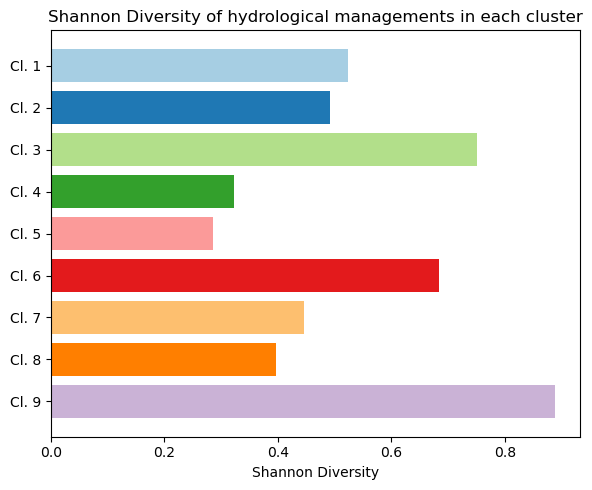

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skbio.diversity import alpha_diversity

def calculate_shannon_diversity(counts):
    """
    Calculate the Shannon diversity given a list of counts for different categories.
    
    Parameters:
    - counts: List of counts for each category.
    
    Returns:
    - Shannon diversity value.
    """
    # Calculate the Shannon diversity
    shannon_diversity = alpha_diversity('shannon', [counts])[0]
    return shannon_diversity

# Define the data
data = {
    'Bayland riparian': [271400, 1705200, 606000, 327600, 62000, 11849500, 974800, 319300, 1371300],
    'Bayland marsh': [208700, 296500, 10405100, 1687900, 268000, 106900, 826800, 603700, 17787900],
    'Bayland non-riparian': [41400, 222800, 573500, 275100, 29100, 77600, 376700, 129700, 955100],
    'Seeps & vernal pools': [400, 52800, 4000, 18800, 320000, 0, 56900, 86000, 10200],
    'Non-bayland playas': [29800, 904900, 125800, 51700, 144800, 4200, 455100, 404100, 116800],
    'Depressional & other non-bayland': [3726100, 24419900, 27034900, 30320600, 14299400, 5463200, 25636000, 17391900, 26638000]
}

# Normalize each cluster's values to 100%
for cluster_idx in range(len(data['Bayland riparian'])):
    total = sum([data[pft_class][cluster_idx] for pft_class in data])
    for pft_class in data:
        data[pft_class][cluster_idx] = (data[pft_class][cluster_idx] / total) * 100

# Create a DataFrame
df = pd.DataFrame(data, index=['Cl. 1', 'Cl. 2', 'Cl. 3', 'Cl. 4', 'Cl. 5', 'Cl. 6', 'Cl. 7', 'Cl. 8', 'Cl. 9'])

# Calculate Shannon diversity for each cluster
shannon_diversity_values = []
for cluster in df.index:
    counts = df.loc[cluster].values
    shannon_diversity = calculate_shannon_diversity(counts)
    shannon_diversity_values.append(shannon_diversity)

# Plot the Shannon diversity values
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
fig, ax = plt.subplots(figsize=(6, 5))
clusters = df.index
y_pos = np.arange(len(clusters))
ax.barh(y_pos, shannon_diversity_values, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(clusters)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Shannon Diversity')
ax.set_title('Shannon Diversity of hydrological managements in each cluster')
plt.tight_layout()

#plt.savefig('shannon_management.svg')
